# Social Network Analysis

In [0]:
! pip install networkx
! pip install plotly
! pip install colorlover

## Importing and Installing packages

In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import IPython
import colorlover as cl
from IPython.display import HTML
from collections import Counter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Twitter Data

In [0]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [0]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [0]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


### Hashtag
Chosen hashtag is <b>#photography</b>. Following analysis is only based on the hashtag.

In [0]:
photographyTag = df[df["tweet"].str.lower().str.contains("#photography", na=False)].copy()

In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(photographyTag)

In [0]:
photographyTag.head(10)

,date,user,tweet,mentioned
1147,2009-06-11 16:58:53,base10,Took a walk at lunch. My lunch-time architectu...,[]
12882,2009-06-11 17:15:44,replayphotos,Just added myself to the http://wefollow.com t...,[]
14482,2009-06-11 17:17:56,cottontw,Just added myself to the http://wefollow.com t...,[]
15171,2009-06-11 17:18:34,gospain,All I can find at the moment about the Noche d...,[]
23958,2009-06-11 17:32:48,hiway,Finally got around to setting up my #photograp...,[]
31519,2009-06-11 17:46:37,pwcarey,@murrayed Thanks again for the book recommend....,[murrayed]
34693,2009-06-11 17:51:09,karensperling,It's official! New writeup in Lexjet Focus #Pa...,[]
40725,2009-06-11 17:59:57,photocentrum,#photography Kata's PR Bags: Grab Your Gear an...,[]
41012,2009-06-11 18:00:18,photocentrum,#photography Casio Exilim EX-S12: Last update ...,[]
44876,2009-06-11 18:05:45,wayneofthedead,http://twitpic.com/74pv2 - #photography - is i...,[]


###Building Mention graph


In [0]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
photographyGraph = mentionGraph(photographyTag)

In [0]:
print("Number of nodes:", len(photographyGraph.nodes()))
print("Number of edges:", len(photographyGraph.edges()))

Number of nodes: 352
Number of edges: 304


In [0]:
components = nx.connected_components(photographyGraph)
list(components)

[{'murrayed', 'pwcarey', 'ymerej'},
 {'',
  'aldorisolvo)',
  'amazingpics',
  'amazingpics:some',
  'andrewbuxton',
  'anthonymartinez',
  'apollophoto',
  'birdfeeders',
  'birdingoz',
  'buonaluce',
  'catherinegrison',
  'compassphotos',
  'credd',
  'damienfranco',
  'durbindigital',
  'fpresources',
  'heathrowe',
  'hopfoot',
  'ice66',
  'ilanbr',
  'ilanbr)',
  'ironwolf8766',
  'jaylevan',
  'jeremyteocx',
  'kellyjo9',
  'makingpixels',
  'mitzs',
  'my_nicki',
  'nminers',
  'nynabl',
  'photocentrum',
  'photosip',
  'phototube',
  'rhysb123',
  'rt_chicago',
  'rtd13',
  'rweiher',
  'rwieher)',
  'saarmst1',
  'samitokhais',
  'shaznyc',
  'shontaeb',
  'smartard',
  'steffilewis',
  'stran9ee',
  'sumsion)',
  'thagoodson',
  'thomasgood',
  'twitographers:people,its',
  'wearephotogs',
  'wearephotogs)',
  'xnix',
  'xnixrt',
  'xtraboy'},
 {'quiteuseful)', 'svenyurgensson'},
 {'popphoto', 'scanmyphotos'},
 {'ecotrotters',
  'gullivergo',
  'havepack',
  'joanna_haugen

In [0]:
d=dict(nx.degree(photographyGraph))
d

{'': 8,
 '-reply': 1,
 '02138now': 1,
 '0lli': 1,
 '1001noisycamera': 7,
 '1kc': 1,
 '2live4him': 2,
 '6alkal6': 1,
 'absolutely_abby': 2,
 'abstracts': 1,
 'added': 1,
 'addthis': 3,
 'aj_wood': 2,
 'aldorisolvo)': 1,
 'alexanderichter': 1,
 'alisha14209': 1,
 'amandastratton': 1,
 'amazingpics': 10,
 'amazingpics:some': 1,
 'amnesiak1978': 1,
 'amyhale': 3,
 'amyshair': 1,
 'andre_m_photog': 1,
 'andrew_davis': 1,
 'andrewbuxton': 1,
 'andrewhyde)': 1,
 'angelsamudre': 1,
 'anthonymartinez': 2,
 'apollophoto': 5,
 'areelulibub': 1,
 'atdigit': 1,
 'bar0s': 1,
 'barradenavidad': 1,
 'berntinge': 2,
 'besttravelpics)': 1,
 'beyondmegapixel': 1,
 'beyondmegapixelshttp://tinyurl.com/y4lug8': 1,
 'birdfeeders': 1,
 'birdingoz': 1,
 'bitfiddler': 1,
 'bnephoto': 2,
 'bnsullivan': 1,
 'bo_mackison': 5,
 'bor64': 1,
 'bpfox4': 2,
 'brazilianart': 2,
 'brighteyedphoto': 3,
 'bucketheadphoto': 1,
 'buonaluce': 7,
 'calumetphoto': 1,
 'caryconover': 1,
 'catherinegrison': 5,
 'cavaroc': 1,
 'ce

In [0]:
y=nx.degree_centrality(photographyGraph)
y

{'': 0.022792022792022793,
 '-reply': 0.002849002849002849,
 '02138now': 0.002849002849002849,
 '0lli': 0.002849002849002849,
 '1001noisycamera': 0.019943019943019943,
 '1kc': 0.002849002849002849,
 '2live4him': 0.005698005698005698,
 '6alkal6': 0.002849002849002849,
 'absolutely_abby': 0.005698005698005698,
 'abstracts': 0.002849002849002849,
 'added': 0.002849002849002849,
 'addthis': 0.008547008547008548,
 'aj_wood': 0.005698005698005698,
 'aldorisolvo)': 0.002849002849002849,
 'alexanderichter': 0.002849002849002849,
 'alisha14209': 0.002849002849002849,
 'amandastratton': 0.002849002849002849,
 'amazingpics': 0.02849002849002849,
 'amazingpics:some': 0.002849002849002849,
 'amnesiak1978': 0.002849002849002849,
 'amyhale': 0.008547008547008548,
 'amyshair': 0.002849002849002849,
 'andre_m_photog': 0.002849002849002849,
 'andrew_davis': 0.002849002849002849,
 'andrewbuxton': 0.002849002849002849,
 'andrewhyde)': 0.002849002849002849,
 'angelsamudre': 0.002849002849002849,
 'anthonym

In [0]:
dataframe=pd.DataFrame(list(d.items()),columns= ['nodes', 'degree']).sort_values(by=['degree'], ascending=False)
dataframe

,nodes,degree
104,jacksoncj1,23
188,hashphoto,12
224,wearephotogs),11
223,amazingpics,10
64,rweiher,9
...,...,...
134,vesselinatp,1
133,ncbeets,1
132,safesolvent,1
131,debasispradhan),1


In [0]:
df1=pd.DataFrame(list(y.items()), columns=['nodes', 'degree_centrality']).sort_values(by=['degree_centrality'], ascending=False)

In [0]:
df1

,nodes,degree_centrality
104,jacksoncj1,0.065527
188,hashphoto,0.034188
224,wearephotogs),0.031339
223,amazingpics,0.028490
64,rweiher,0.025641
...,...,...
134,vesselinatp,0.002849
133,ncbeets,0.002849
132,safesolvent,0.002849
131,debasispradhan),0.002849


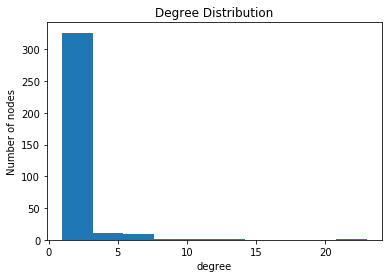

In [0]:
plt.hist(dataframe['degree'].values)
plt.title("Degree Distribution")
plt.ylabel("Number of nodes")
plt.xlabel("degree")
fig = plt.gcf()

From the distribution mentioned in the above histogram, itis clear that there are more than 300 nodes with degree <5. On the otherhand, there is one with degree >20 and couple of nodes having degrees between 10 and 15. This also indicates the degree centrality of the nodes with higher degree being higher than the others. 

In [0]:
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [0]:
addRandomPositions(photographyGraph)

In [0]:

HTML(cl.to_html( cl.scales['9'] ))
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [0]:
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
nodes=[]
ew=[]
for (node1,node2) in photographyGraph.edges():
  nodes.append([node1,node2])
  edgewidth=photographyGraph[node1][node2]['numberMentions']
  ew.append(edgewidth)



In [0]:
DF=pd.DataFrame(list(zip(nodes,ew)),
              columns=['nodes','edge_weight']).sort_values(by=['edge_weight'], ascending=False)

In [0]:
DF.head()

,nodes,edge_weight
3,"[photocentrum, fpresources]",11
43,"[polaroidteam, polaroidgirl]",4
55,"[catherinegrison, hopfoot]",4
56,"[catherinegrison, fpresources]",4
11,"[, fpresources]",4


In [0]:
def plotNetworkSizeColor(graph):

       
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgecolor=int(299*(edgeWidth-min(ew))/(max(ew)-min(ew)))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgecolor]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False,plot_bgcolor='rgba(50,50,0,0)')
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(photographyGraph)


### Content Analysis

In [0]:
photographyTag

,date,user,tweet,mentioned
1147,2009-06-11 16:58:53,base10,Took a walk at lunch. My lunch-time architectu...,[]
12882,2009-06-11 17:15:44,replayphotos,Just added myself to the http://wefollow.com t...,[]
14482,2009-06-11 17:17:56,cottontw,Just added myself to the http://wefollow.com t...,[]
15171,2009-06-11 17:18:34,gospain,All I can find at the moment about the Noche d...,[]
23958,2009-06-11 17:32:48,hiway,Finally got around to setting up my #photograp...,[]
...,...,...,...,...
3416456,2009-06-14 23:29:40,kellyshipp,60+ Useful #Photoshop Actions For #creative Ph...,[jdesignz)]
3418053,2009-06-14 23:31:48,gcriff,"Bruce Percy, Portfolio 27, Taj Mahal. #photogr...",[]
3431662,2009-06-14 23:51:23,frugalnyc,RT @hashphoto #Photography: Awesome Set of 170...,"[hashphoto, swichi293]"
3431663,2009-06-14 23:51:23,frugalnyc,RT @hashphoto #Photography: Awesome Set of 170...,"[hashphoto, swichi293]"


In [0]:
Tweets = photographyTag["tweet"].str.cat(sep=' ')


In [0]:
Words= [word.strip(""" ,.:'\";""").lower() for word in Tweets.split()]
chosenWords = [word for word in Words if word not in stop]
chosenWordsCounter = Counter(chosenWords)

In [0]:
chosenWordsCounter.most_common(20)

[('#photography', 645),
 ('rt', 234),
 ('-', 147),
 ('twitter', 83),
 ('photo', 79),
 ('added', 77),
 ('directory', 74),
 ('http://wefollow.com', 72),
 ('photography', 65),
 ('#photo', 65),
 ('day', 48),
 ('new', 40),
 ('(via', 38),
 ('', 38),
 ('review', 33),
 ('2009-06-12', 33),
 ('#photographer', 31),
 ('#photog', 29),
 ('digital', 29),
 ('blog', 29)]

Basic description of the theme based on the most common words in the tweets is <b>'PHOTOGRAPHY'</b>. Almost all top occurence of words are regarding the chosen hashtag.

In [0]:
user_specific={}
for i in photographyTag["user"]:
  tweet = photographyTag[photographyTag["user"] == i]["tweet"]
  l=[]
  for j in tweet:
    l.extend(j.split())
  user_specific[i] = Counter(l) 

In [0]:
list(dict(user_specific['spongetoast19'].most_common(3)).keys())

['Just', 'added', 'myself']

In [0]:
def plotNetworkSizeColor1(graph):

       
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgecolor=int(299*(edgeWidth-min(ew))/(max(ew)-min(ew)))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgecolor]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        try:
          w = [word for word in list(dict(user_specific[node].most_common(3)).keys())]
        except:
          w = ['N','N','N']
    
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text=" %s , %s ,%s" %(w[0],w[1],w[2]),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False,plot_bgcolor='rgba(50,50,0,0)')
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor1(photographyGraph)

###Centrality Analysis

In [0]:
degree_centrality = nx.degree_centrality(photographyGraph)
betweenness_centrality=nx.betweenness_centrality(photographyGraph)
closenessCentr = nx.closeness_centrality(photographyGraph)

####i. Degree Centrality

In [0]:
degree_centrality

{'': 0.022792022792022793,
 '-reply': 0.002849002849002849,
 '02138now': 0.002849002849002849,
 '0lli': 0.002849002849002849,
 '1001noisycamera': 0.019943019943019943,
 '1kc': 0.002849002849002849,
 '2live4him': 0.005698005698005698,
 '6alkal6': 0.002849002849002849,
 'absolutely_abby': 0.005698005698005698,
 'abstracts': 0.002849002849002849,
 'added': 0.002849002849002849,
 'addthis': 0.008547008547008548,
 'aj_wood': 0.005698005698005698,
 'aldorisolvo)': 0.002849002849002849,
 'alexanderichter': 0.002849002849002849,
 'alisha14209': 0.002849002849002849,
 'amandastratton': 0.002849002849002849,
 'amazingpics': 0.02849002849002849,
 'amazingpics:some': 0.002849002849002849,
 'amnesiak1978': 0.002849002849002849,
 'amyhale': 0.008547008547008548,
 'amyshair': 0.002849002849002849,
 'andre_m_photog': 0.002849002849002849,
 'andrew_davis': 0.002849002849002849,
 'andrewbuxton': 0.002849002849002849,
 'andrewhyde)': 0.002849002849002849,
 'angelsamudre': 0.002849002849002849,
 'anthonym

#### ii. Betweenness Centrality

In [0]:
betweenness_centrality

{'': 0.0044444444444444444,
 '-reply': 0.0,
 '02138now': 0.0,
 '0lli': 0.0,
 '1001noisycamera': 0.02074074074074074,
 '1kc': 0.0,
 '2live4him': 0.0,
 '6alkal6': 0.0,
 'absolutely_abby': 1.628001628001628e-05,
 'abstracts': 0.0,
 'added': 0.0,
 'addthis': 0.0161009361009361,
 'aj_wood': 1.628001628001628e-05,
 'aldorisolvo)': 0.0,
 'alexanderichter': 0.0,
 'alisha14209': 0.0,
 'amandastratton': 0.0,
 'amazingpics': 0.00450685117351784,
 'amazingpics:some': 0.0,
 'amnesiak1978': 0.0,
 'amyhale': 4.884004884004884e-05,
 'amyshair': 0.0,
 'andre_m_photog': 0.0,
 'andrew_davis': 0.0,
 'andrewbuxton': 0.0,
 'andrewhyde)': 0.0,
 'angelsamudre': 0.0,
 'anthonymartinez': 0.001921041921041921,
 'apollophoto': 0.002490842490842491,
 'areelulibub': 0.0,
 'atdigit': 0.0,
 'bar0s': 0.0,
 'barradenavidad': 0.0,
 'berntinge': 0.0,
 'besttravelpics)': 0.0,
 'beyondmegapixel': 0.0,
 'beyondmegapixelshttp://tinyurl.com/y4lug8': 0.0,
 'birdfeeders': 0.0,
 'birdingoz': 0.0,
 'bitfiddler': 0.0,
 'bnephoto':

####iii. Closeness Centrality

In [0]:
closenessCentr

{'': 0.04302606990779034,
 '-reply': 0.01214574898785425,
 '02138now': 0.002849002849002849,
 '0lli': 0.007122507122507123,
 '1001noisycamera': 0.04718728673101296,
 '1kc': 0.002849002849002849,
 '2live4him': 0.005698005698005698,
 '6alkal6': 0.002849002849002849,
 'absolutely_abby': 0.005698005698005698,
 'abstracts': 0.002849002849002849,
 'added': 0.003798670465337132,
 'addthis': 0.040957941948040956,
 'aj_wood': 0.005698005698005698,
 'aldorisolvo)': 0.04189973299920944,
 'alexanderichter': 0.010989010989010988,
 'alisha14209': 0.03190297277700877,
 'amandastratton': 0.005128205128205128,
 'amazingpics': 0.05299900001886757,
 'amazingpics:some': 0.031883860569119536,
 'amnesiak1978': 0.007122507122507123,
 'amyhale': 0.008547008547008548,
 'amyshair': 0.002849002849002849,
 'andre_m_photog': 0.002849002849002849,
 'andrew_davis': 0.03190297277700877,
 'andrewbuxton': 0.031261128917378915,
 'andrewhyde)': 0.006512006512006512,
 'angelsamudre': 0.010989010989010988,
 'anthonymartine

In [0]:
def plotNetworkSizeColor(graph,clty):
   
    maxCentr = max(clty.values())
    minCentr = min(clty.values())    
    scatters=[]
    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        if (clty==degree_centrality):
          s = Scatter(x=[x0, x1],y=[y0, y1],hoverinfo='none',mode='lines',line=scatter.Line(width=1 ,color='#888'))
        elif (clty == betweenness_centrality):
          s = Scatter(x=[x0, x1],y=[y0, y1],hoverinfo='none',mode='lines',line=scatter.Line(width=1 ,color='#999'))
        else:
          s = Scatter(x=[x0, x1],y=[y0, y1],hoverinfo='none',mode='lines',line=scatter.Line(width=1 ,color='#777'))
        scatters.append(s)
    for node in graph.nodes():
      if (clty==degree_centrality):
        nodeCentr = clty[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n DegCentrality: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
      elif (clty == betweenness_centrality):
        nodeCentr = clty[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nBetCentrality: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=betweenness_centrality[node]*1000,         
                    line=dict(width=2)))
      else:
        nodeCentr = clty[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseCentrality: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=closenessCentr[node]*1000,         
                    line=dict(width=2)))
        
      scatters.append(s)
    
    layout = Layout(showlegend=False,plot_bgcolor='rgba(50,50,50,0)')
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(photographyGraph,degree_centrality)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(photographyGraph,betweenness_centrality)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(photographyGraph,closenessCentr)

In [0]:
df1.head()

,nodes,degree_centrality
104,jacksoncj1,0.065527
188,hashphoto,0.034188
224,wearephotogs),0.031339
223,amazingpics,0.028490
64,rweiher,0.025641


In [0]:
df2=pd.DataFrame(list(betweenness_centrality.items()), columns=['nodes', 'betweenness_centrality']).sort_values(by=['betweenness_centrality'], ascending=False)
df2.head()

,nodes,betweenness_centrality
150,1001noisycamera,0.020741
188,hashphoto,0.020480
104,jacksoncj1,0.019520
149,csoltis,0.018787
219,bo_mackison,0.018592


In [0]:
df3=pd.DataFrame(list(closenessCentr.items()), columns=['nodes', 'closeness_centrality']).sort_values(by=['closeness_centrality'], ascending=False)
df3.head(10)

,nodes,closeness_centrality
69,buonaluce,0.057574
224,wearephotogs),0.053710
223,amazingpics,0.052999
276,stran9ee,0.050018
64,rweiher,0.048502
150,1001noisycamera,0.047187
68,fpresources,0.047076
185,ice66,0.045993
239,dixonhamby,0.045964
149,csoltis,0.045964


<b>Degree centrality</b> is defined as the number of
edges incident upon a node. 

<b> Closeness Centrality</b>  of a node is defined as the sum of its distances to all other nodes.

<b> Betweenness Centrality</b> quantifies the number of times a node acts as a bridge along the shortest path between two other
nodes.

The key players from the graphs using the above mentioned centrality measures are similar to the values in all of degree, closeness and betweenness centralities.

As the highly connected people (nodes with high degree) are bound too be closer to other people (nodes) and possibly information passes through them to all other people (nodes), them being the bridge.


###Connectivity Patterns

1. Number of maximal cliques in the graph

In [0]:
nmax_cliques=nx.graph_number_of_cliques(photographyGraph)

In [0]:
nmax_cliques

264

2. The graph's clique number (size of the largest clique in the graph).

In [0]:
gclique_number=nx.graph_clique_number(photographyGraph)

In [0]:
gclique_number

3

3. Number of maximal cliques for each node

In [0]:
nofcliques=nx.number_of_cliques(photographyGraph)
nofcliques

{'': 7,
 '-reply': 1,
 '02138now': 1,
 '0lli': 1,
 '1001noisycamera': 7,
 '1kc': 1,
 '2live4him': 1,
 '6alkal6': 1,
 'absolutely_abby': 2,
 'abstracts': 1,
 'added': 1,
 'addthis': 2,
 'aj_wood': 2,
 'aldorisolvo)': 1,
 'alexanderichter': 1,
 'alisha14209': 1,
 'amandastratton': 1,
 'amazingpics': 9,
 'amazingpics:some': 1,
 'amnesiak1978': 1,
 'amyhale': 3,
 'amyshair': 1,
 'andre_m_photog': 1,
 'andrew_davis': 1,
 'andrewbuxton': 1,
 'andrewhyde)': 1,
 'angelsamudre': 1,
 'anthonymartinez': 2,
 'apollophoto': 4,
 'areelulibub': 1,
 'atdigit': 1,
 'bar0s': 1,
 'barradenavidad': 1,
 'berntinge': 1,
 'besttravelpics)': 1,
 'beyondmegapixel': 1,
 'beyondmegapixelshttp://tinyurl.com/y4lug8': 1,
 'birdfeeders': 1,
 'birdingoz': 1,
 'bitfiddler': 1,
 'bnephoto': 2,
 'bnsullivan': 1,
 'bo_mackison': 5,
 'bor64': 1,
 'bpfox4': 1,
 'brazilianart': 2,
 'brighteyedphoto': 3,
 'bucketheadphoto': 1,
 'buonaluce': 6,
 'calumetphoto': 1,
 'caryconover': 1,
 'catherinegrison': 2,
 'cavaroc': 1,
 'cel

4. Size of the largest maximal clique containing each given node.

In [0]:
lmax_clique=nx.node_clique_number(photographyGraph)
lmax_clique

{'': 3,
 '-reply': 2,
 '02138now': 2,
 '0lli': 2,
 '1001noisycamera': 2,
 '1kc': 2,
 '2live4him': 3,
 '6alkal6': 2,
 'absolutely_abby': 2,
 'abstracts': 2,
 'added': 2,
 'addthis': 3,
 'aj_wood': 2,
 'aldorisolvo)': 2,
 'alexanderichter': 2,
 'alisha14209': 2,
 'amandastratton': 2,
 'amazingpics': 3,
 'amazingpics:some': 2,
 'amnesiak1978': 2,
 'amyhale': 2,
 'amyshair': 2,
 'andre_m_photog': 2,
 'andrew_davis': 2,
 'andrewbuxton': 2,
 'andrewhyde)': 2,
 'angelsamudre': 2,
 'anthonymartinez': 2,
 'apollophoto': 3,
 'areelulibub': 2,
 'atdigit': 2,
 'bar0s': 2,
 'barradenavidad': 2,
 'berntinge': 3,
 'besttravelpics)': 2,
 'beyondmegapixel': 2,
 'beyondmegapixelshttp://tinyurl.com/y4lug8': 2,
 'birdfeeders': 2,
 'birdingoz': 2,
 'bitfiddler': 2,
 'bnephoto': 2,
 'bnsullivan': 2,
 'bo_mackison': 2,
 'bor64': 2,
 'bpfox4': 3,
 'brazilianart': 2,
 'brighteyedphoto': 2,
 'bucketheadphoto': 2,
 'buonaluce': 3,
 'calumetphoto': 2,
 'caryconover': 2,
 'catherinegrison': 3,
 'cavaroc': 2,
 'cel

There are 264 cliques in the graph, which mention about the existence of 264 sub groups (subsets) in the graph. The largest size of the clique being three suggets that, 3 people are closely related to each other and share information. Any further addition of nodes will lead to clique being poorly connected. 
There were some people who are in multiple groups, from the data it is also observed that some nodes are a part of 5-7 cliques. This describes maximum number of times a person is mentioned in the tweets.
Above mentioned analysis also describes the strength of the clique for each node.